In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
park = pd.read_csv('/content/drive/Othercomputers/내 컴퓨터/2klips/KDT3/5. 데이터분석/데이터/전국도시공원표준데이터.csv', encoding='ms949')
park.head()

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
plt.rc('font', family='NanumBarunGothic')

In [5]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18137 non-null  object 
 1   공원명           18137 non-null  object 
 2   공원구분          18137 non-null  object 
 3   소재지도로명주소      8039 non-null   object 
 4   소재지지번주소       17158 non-null  object 
 5   위도            18137 non-null  float64
 6   경도            18137 non-null  float64
 7   공원면적          18137 non-null  float64
 8   공원보유시설(운동시설)  4845 non-null   object 
 9   공원보유시설(유희시설)  6964 non-null   object 
 10  공원보유시설(편익시설)  5084 non-null   object 
 11  공원보유시설(교양시설)  1160 non-null   object 
 12  공원보유시설(기타시설)  3116 non-null   object 
 13  지정고시일         15225 non-null  object 
 14  관리기관명         17383 non-null  object 
 15  전화번호          16957 non-null  object 
 16  데이터기준일자       18137 non-null  object 
 17  제공기관코드        18137 non-null  object 
 18  제공기관명         18137 non-nu

In [6]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [7]:
park.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)', '공원보유시설(기타시설)', '지정고시일', '관리기관명', 'Unnamed: 19'], inplace=True)

In [8]:
park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구
3,26440-00004,용두공원,어린이공원,NaN,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구
4,26440-00005,새동내공원,어린이공원,NaN,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구


<Axes: xlabel='경도', ylabel='위도'>

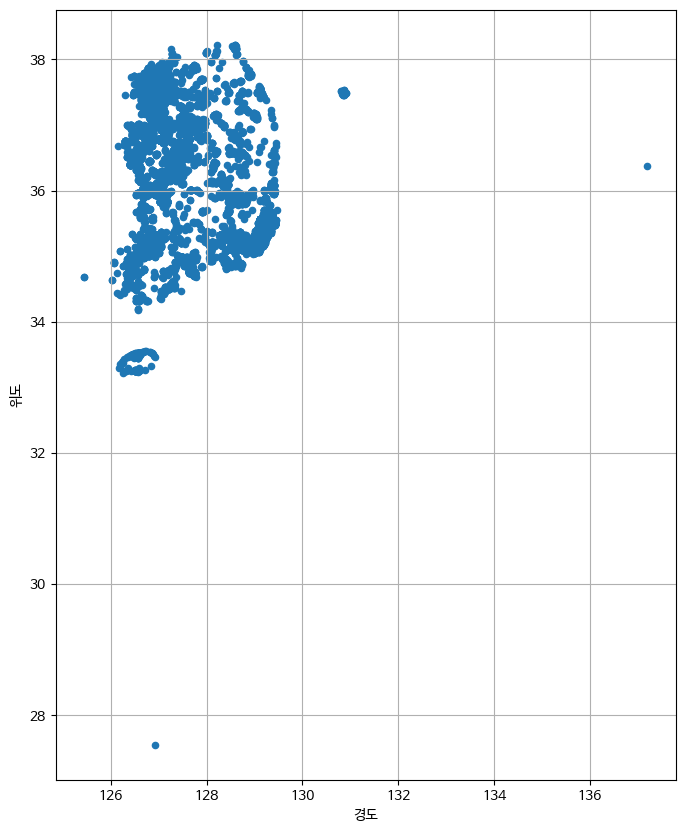

In [9]:
park.plot.scatter(x='경도', y='위도', figsize=(8, 10), grid=True)

<Axes: ylabel='위도'>

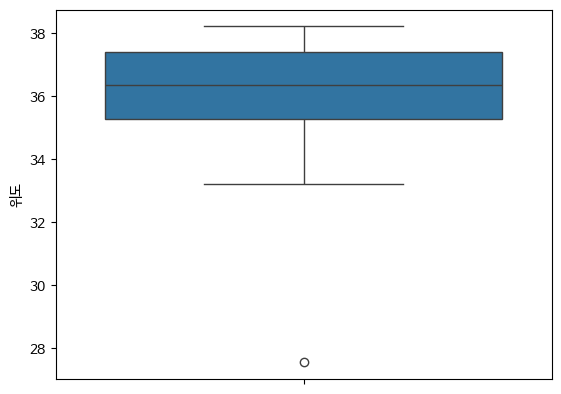

In [10]:
# boxplot
# 데이터의 분포를 시각화하는데 유용
# 주로 데이터의 중앙값(중위수, median), 사분위수(Q1[25%], Q2[50%], Q3[75%], Q4[100%]), 이상치 등을 표현하는데 활용
# 상자: Q1과 Q3 사이의 범위
# 상자 내부 선: Q2(중앙값)
# 수염: 데이터의 최소값과 최대값 / 아래 수염(Q1 - 1.5 * IQR), 위쪽 수염(Q3 + 1.5 * IQR)
# IQR = Q3 - Q1, 데이터의 변동성을 평가하는데 사용
# 수염을 벗어나는 값들은 이상치로 간주됨

sns.boxplot(y=park['위도'])

<Axes: ylabel='경도'>

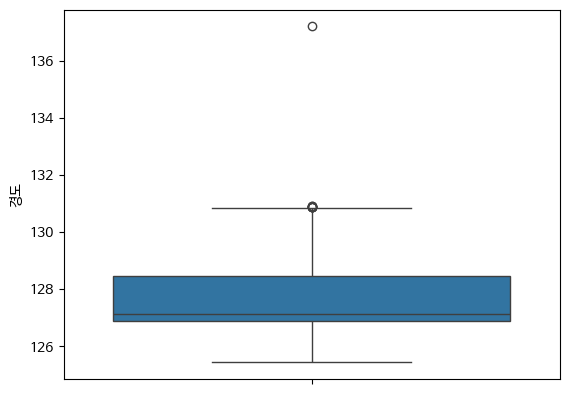

In [11]:
sns.boxplot(y=park['경도'])

In [12]:
# 위도와 경도의 이상치로 판별되는 데이터를 확인
park.loc[(park['위도'] < 32) | (park['경도'] > 132 )]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명
374,11440-00004,와우공원,근린공원,NaN,서울특별시 마포구 창전동3-231 등 59필지,27.551606,126.929047,73590.0,02-3153-9553,2019-07-22,3130000,서울특별시 마포구
12926,43113-00080,근린공원5(만수공원),근린공원,NaN,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.0,043-201-4433,2019-06-21,5710000,충청북도 청주시


In [13]:
park_loc_error = park.loc[(park['위도'] < 32) | (park['경도'] > 132 )]
park_loc_error

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명
374,11440-00004,와우공원,근린공원,NaN,서울특별시 마포구 창전동3-231 등 59필지,27.551606,126.929047,73590.0,02-3153-9553,2019-07-22,3130000,서울특별시 마포구
12926,43113-00080,근린공원5(만수공원),근린공원,NaN,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.0,043-201-4433,2019-06-21,5710000,충청북도 청주시


In [14]:
park = park.loc[(park['위도'] >= 32) & (park['경도'] <= 132)]
park.shape

(18135, 12)

In [15]:
park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구
3,26440-00004,용두공원,어린이공원,NaN,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구
4,26440-00005,새동내공원,어린이공원,NaN,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구


In [16]:
# '소재지도로명주소'가 입력되지 않고, '소재지지번주소'만 입력된 데이터를 확인
park.loc[park['소재지도로명주소'].isnull() & park['소재지지번주소'].notnull()]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구
3,26440-00004,용두공원,어린이공원,NaN,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구
4,26440-00005,새동내공원,어린이공원,NaN,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구
...,...,...,...,...,...,...,...,...,...,...,...,...
18132,28140-00009,송림4공원,어린이공원,NaN,인천광역시 동구 송림동 291-6,37.478715,126.653257,412.9,032-770-6205,2019-07-30,3500000,인천광역시 동구
18133,47760-00002,서부공원,근린공원,NaN,경상북도 영양군 영양읍 서부리 123,36.660456,129.114953,56045.0,054-680-6340,2019-09-05,5170000,경상북도 영양군
18134,47760-00003,입암공원,근린공원,NaN,경상북도 영양군 입암면 신구리 산27-5,36.594802,129.093007,109262.0,054-680-6340,2019-09-05,5170000,경상북도 영양군
18135,47760-00004,수비공원,근린공원,NaN,경상북도 영양군 수비면 발리리 산48,36.761440,129.200011,67159.0,054-680-6340,2019-09-05,5170000,경상북도 영양군


In [17]:
# '소재지도로명주소'와 '소재지지번주소'가 모두 입력되지 않은 데이터를 확인
park.loc[park['소재지도로명주소'].isnull() & park['소재지지번주소'].isnull()]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명


In [18]:
# '소재지도로명주소' 가 입력되지 않은 데이터는 '소재지지번주소'로 대신 채움
# for i in park.index:
#   if pd.isnull(park.loc[i, '소재지도로명주소']):
#     park.loc[i, '소재지도로명주소'] = park.loc[i, '소재지지번주소']

# park.head()

park['소재지도로명주소'].fillna(park['소재지지번주소'], inplace=True)

<ipython-input-18-4a5033c22592>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park['소재지도로명주소'].fillna(park['소재지지번주소'], inplace=True)


In [19]:
# park['소재지도로명주소'].str.split(' ')
# 예) [부산광역시, 강서구, 구랑동, 1199-7]

# park['소재주도로명주소'].str.split(' ', expand=True)
# 데이터프레임으로 데이터가 분리되고, 인덱싱과 슬라이싱이 가능
park['소재지도로명주소'].str.split(' ', expand=True)

,0,1,2,3,4,5,6,7,8
0,부산광역시,강서구,구랑동,1199-7,None,None,None,None,None
1,부산광역시,강서구,구랑동,1219,None,None,None,None,None
2,부산광역시,강서구,대저1동,1330-7,None,None,None,None,None
3,부산광역시,강서구,대저2동,1870-67,None,None,None,None,None
4,부산광역시,강서구,대저2동,2407-1,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
18132,인천광역시,동구,송림동,291-6,None,None,None,None,None
18133,경상북도,영양군,영양읍,서부리,123,None,None,None,None
18134,경상북도,영양군,입암면,신구리,산27-5,None,None,None,None
18135,경상북도,영양군,수비면,발리리,산48,None,None,None,None


In [20]:
# '소재지도로명주소'에서 '시도'만 추출하여 '시도' 파생변수를 생성
park['시도'] = park['소재지도로명주소'].str.split(' ', expand=True)[0]
park.head()

<ipython-input-20-3d18fe85fe26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park['시도'] = park['소재지도로명주소'].str.split(' ', expand=True)[0]


,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,시도
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시
1,26440-00002,압곡공원,근린공원,부산광역시 강서구 구랑동 1219,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시
2,26440-00003,서연정공원,소공원,부산광역시 강서구 대저1동 1330-7,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시
3,26440-00004,용두공원,어린이공원,부산광역시 강서구 대저2동 1870-67,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시
4,26440-00005,새동내공원,어린이공원,부산광역시 강서구 대저2동 2407-1,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시


In [21]:
park['시도'].value_counts()

시도
경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1744
충청남도       1723
전라북도       1137
경상북도        917
충청북도        898
울산광역시       887
인천광역시       675
부산광역시       653
강원도         647
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
강원            1
Name: count, dtype: int64

In [22]:
# '시도'의 '강원'을 '강원도'로 변경
# park.loc[park['시도'] == '강원', '시도'] = '강원도'

park['시도'][park['시도'] == '강원'] = '강원도'

<ipython-input-22-85457743b6b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park['시도'][park['시도'] == '강원'] = '강원도'


In [23]:
park['시도'].value_counts()

시도
경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1744
충청남도       1723
전라북도       1137
경상북도        917
충청북도        898
울산광역시       887
인천광역시       675
부산광역시       653
강원도         648
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
Name: count, dtype: int64

<Axes: xlabel='경도', ylabel='위도'>

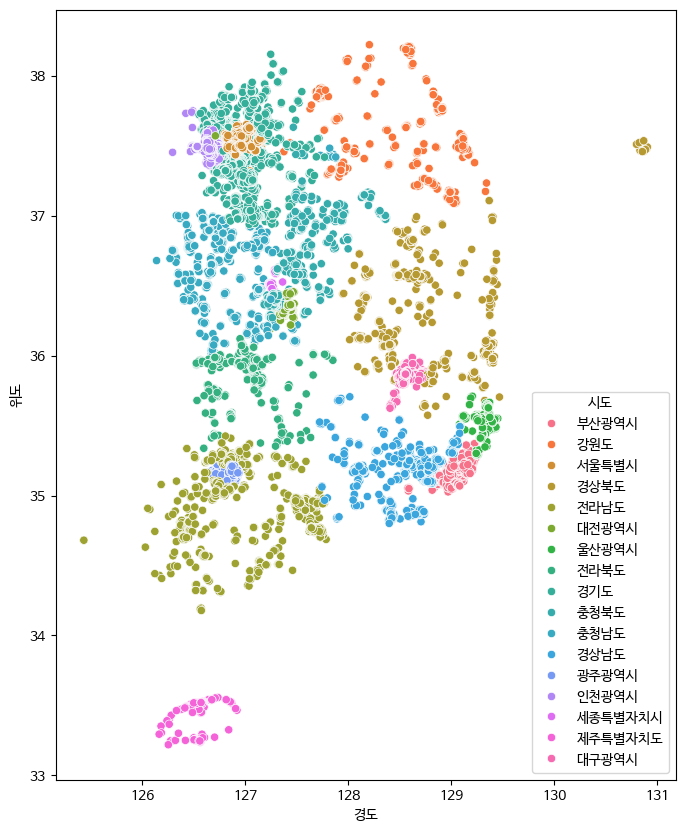

In [24]:
plt.figure(figsize=(8, 10))
sns.scatterplot(data=park, x='경도', y='위도', hue='시도')

In [25]:
park_sido = pd.DataFrame(park['시도'].value_counts())
park_sido

,count
시도,
경기도,3318
전라남도,1882
경상남도,1825
서울특별시,1744
충청남도,1723
전라북도,1137
경상북도,917
충청북도,898
울산광역시,887


In [26]:
# value_counts(normalize=True): 전체 합계에 대한 비율을 계산
park_sido_normalize = pd.DataFrame(park['시도'].value_counts(normalize=True))
park_sido_normalize

,proportion
시도,
경기도,0.182961
전라남도,0.103777
경상남도,0.100634
서울특별시,0.096168
충청남도,0.095010
전라북도,0.062696
경상북도,0.050565
충청북도,0.049518
울산광역시,0.048911


In [27]:
# value_counts(ascending=False): 내림차순으로 정렬
park_sido_ascending = pd.DataFrame(park['시도'].value_counts(ascending=False))
park_sido_ascending

,count
시도,
경기도,3318
전라남도,1882
경상남도,1825
서울특별시,1744
충청남도,1723
전라북도,1137
경상북도,917
충청북도,898
울산광역시,887


In [28]:
# 시도별 합계 데이터(park_sido)와 비율 데이터(park_sido_normalize)를 병합
pd.concat([park_sido, park_sido_normalize], axis=1)

,count,proportion
시도,,
경기도,3318,0.182961
전라남도,1882,0.103777
경상남도,1825,0.100634
서울특별시,1744,0.096168
충청남도,1723,0.095010
전라북도,1137,0.062696
경상북도,917,0.050565
충청북도,898,0.049518
울산광역시,887,0.048911


In [29]:
park_sido = park_sido.merge(park_sido_normalize, left_index=True, right_index=True).reset_index()
park_sido

,시도,count,proportion
0,경기도,3318,0.182961
1,전라남도,1882,0.103777
2,경상남도,1825,0.100634
3,서울특별시,1744,0.096168
4,충청남도,1723,0.095010
5,전라북도,1137,0.062696
6,경상북도,917,0.050565
7,충청북도,898,0.049518
8,울산광역시,887,0.048911
9,인천광역시,675,0.037221


In [30]:
park_sido.columns = ['시도', '합계', '평균']
park_sido

,시도,합계,평균
0,경기도,3318,0.182961
1,전라남도,1882,0.103777
2,경상남도,1825,0.100634
3,서울특별시,1744,0.096168
4,충청남도,1723,0.095010
5,전라북도,1137,0.062696
6,경상북도,917,0.050565
7,충청북도,898,0.049518
8,울산광역시,887,0.048911
9,인천광역시,675,0.037221


<Axes: xlabel='시도', ylabel='합계'>

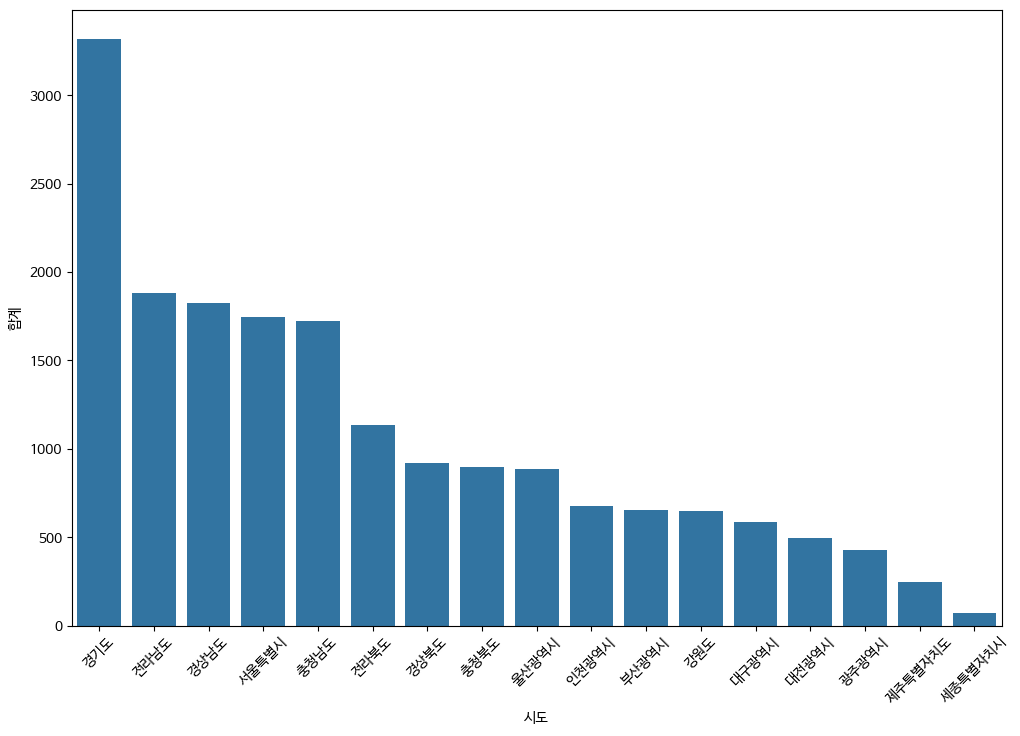

In [32]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
sns.barplot(data=park_sido, x='시도', y='합계')

<Axes: xlabel='합계', ylabel='시도'>

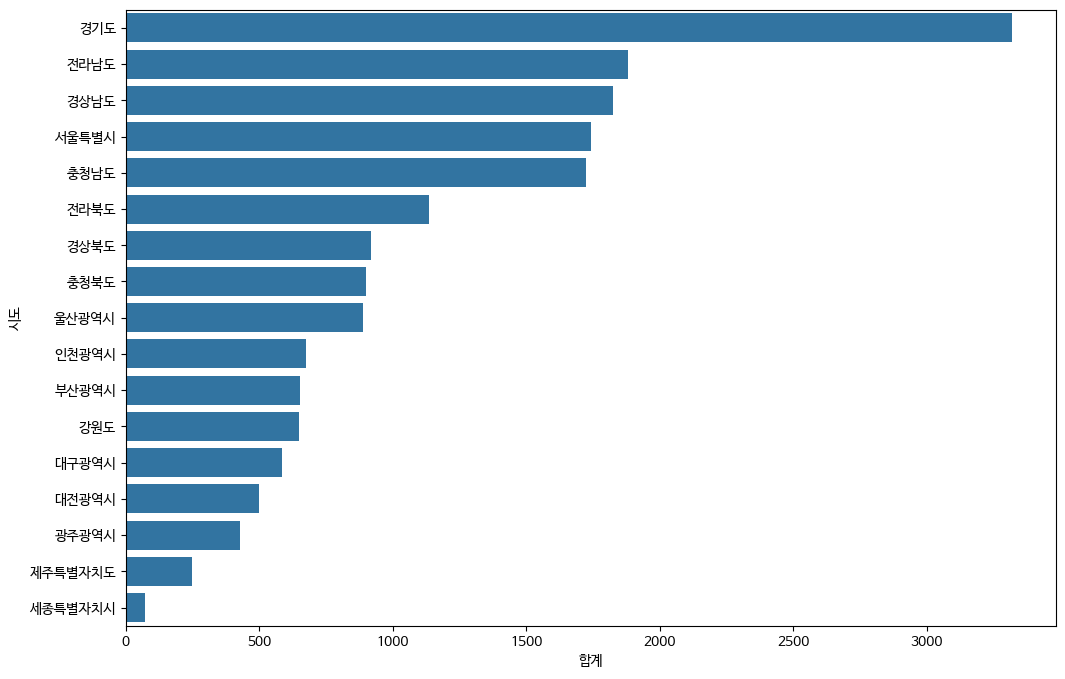

In [33]:
plt.figure(figsize=(12, 8))
sns.barplot(data=park_sido, x='합계', y='시도')